# How are ensembles organized spatially?

We run EnsemblePursuit on binned neural timeseries and then plot the sparse embedding of ensembles spatially.

In [1]:
import sys
sys.path.insert(1, '/home/maria/Documents/EnsemblePursuit')
from EnsemblePursuit.EnsemblePursuit import EnsemblePursuit
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import os

In [2]:
# * set root to the location where you downloaded the data *
root      = '/home/maria/Documents/LargeData'# LOAD the neural data
spks = np.load(os.path.join(root, 'spks.npy')) # deconvolved data
stat = np.load(os.path.join(root, 'stat.npy'), allow_pickle=True) # these are the per-neuron stats returned by suite2p
# these are the neurons' 2D coordinates
ypos = np.array([stat[n]['med'][0] for n in range(len(stat))]) 
# (notice the python list comprehension [X(n) for n in range(N)])
xpos = np.array([stat[n]['med'][1] for n in range(len(stat))]) 

del stat # we delete stat because we don't need any other fields from it

In [3]:
dt=1
iframe = np.load(os.path.join(root, 'iframe.npy')) # iframe[n] is the microscope frame for the image frame n
ivalid = iframe+dt<spks.shape[-1] # remove timepoints outside the valid time range
iframe = iframe[ivalid]
S = spks[:, iframe+dt]
print(S.shape)

(18795, 30560)


In [4]:
#Bin data
tbin=3
NT = S.shape[1]
nt = int(np.floor(NT/tbin))
# using this format bin S
Sbin = np.reshape(S[:,:nt*tbin], (S.shape[0], nt, tbin)).mean(axis=-1)
print(Sbin.shape)
#Don't need S anymore
del S

(18795, 10186)


In [5]:
#Uncomment to compute U and V
ep=EnsemblePursuit(n_components=200,lam=0.01,n_kmeans=200)
model=ep.fit(Sbin.T)
V=model.components_
U=model.weights

obtained 200 PCs in 15.3424 seconds
initialized 200 clusters with k-means in 45.0152 seconds
ensemble 0, time 51.32, nr neurons 9088, EV 0.0162
ensemble 25, time 239.21, nr neurons 430, EV 0.0563
ensemble 50, time 341.43, nr neurons 344, EV 0.0685
ensemble 75, time 425.98, nr neurons 147, EV 0.0770
ensemble 100, time 501.76, nr neurons 142, EV 0.0841
ensemble 125, time 570.77, nr neurons 66, EV 0.0898
ensemble 150, time 635.03, nr neurons 77, EV 0.0951
ensemble 175, time 694.36, nr neurons 68, EV 0.0996
ensemble 199, time 747.29, nr neurons 32, EV 0.1034
average sparsity is 0.0147


Some ensembles are spatially spread out and others are more localized. 

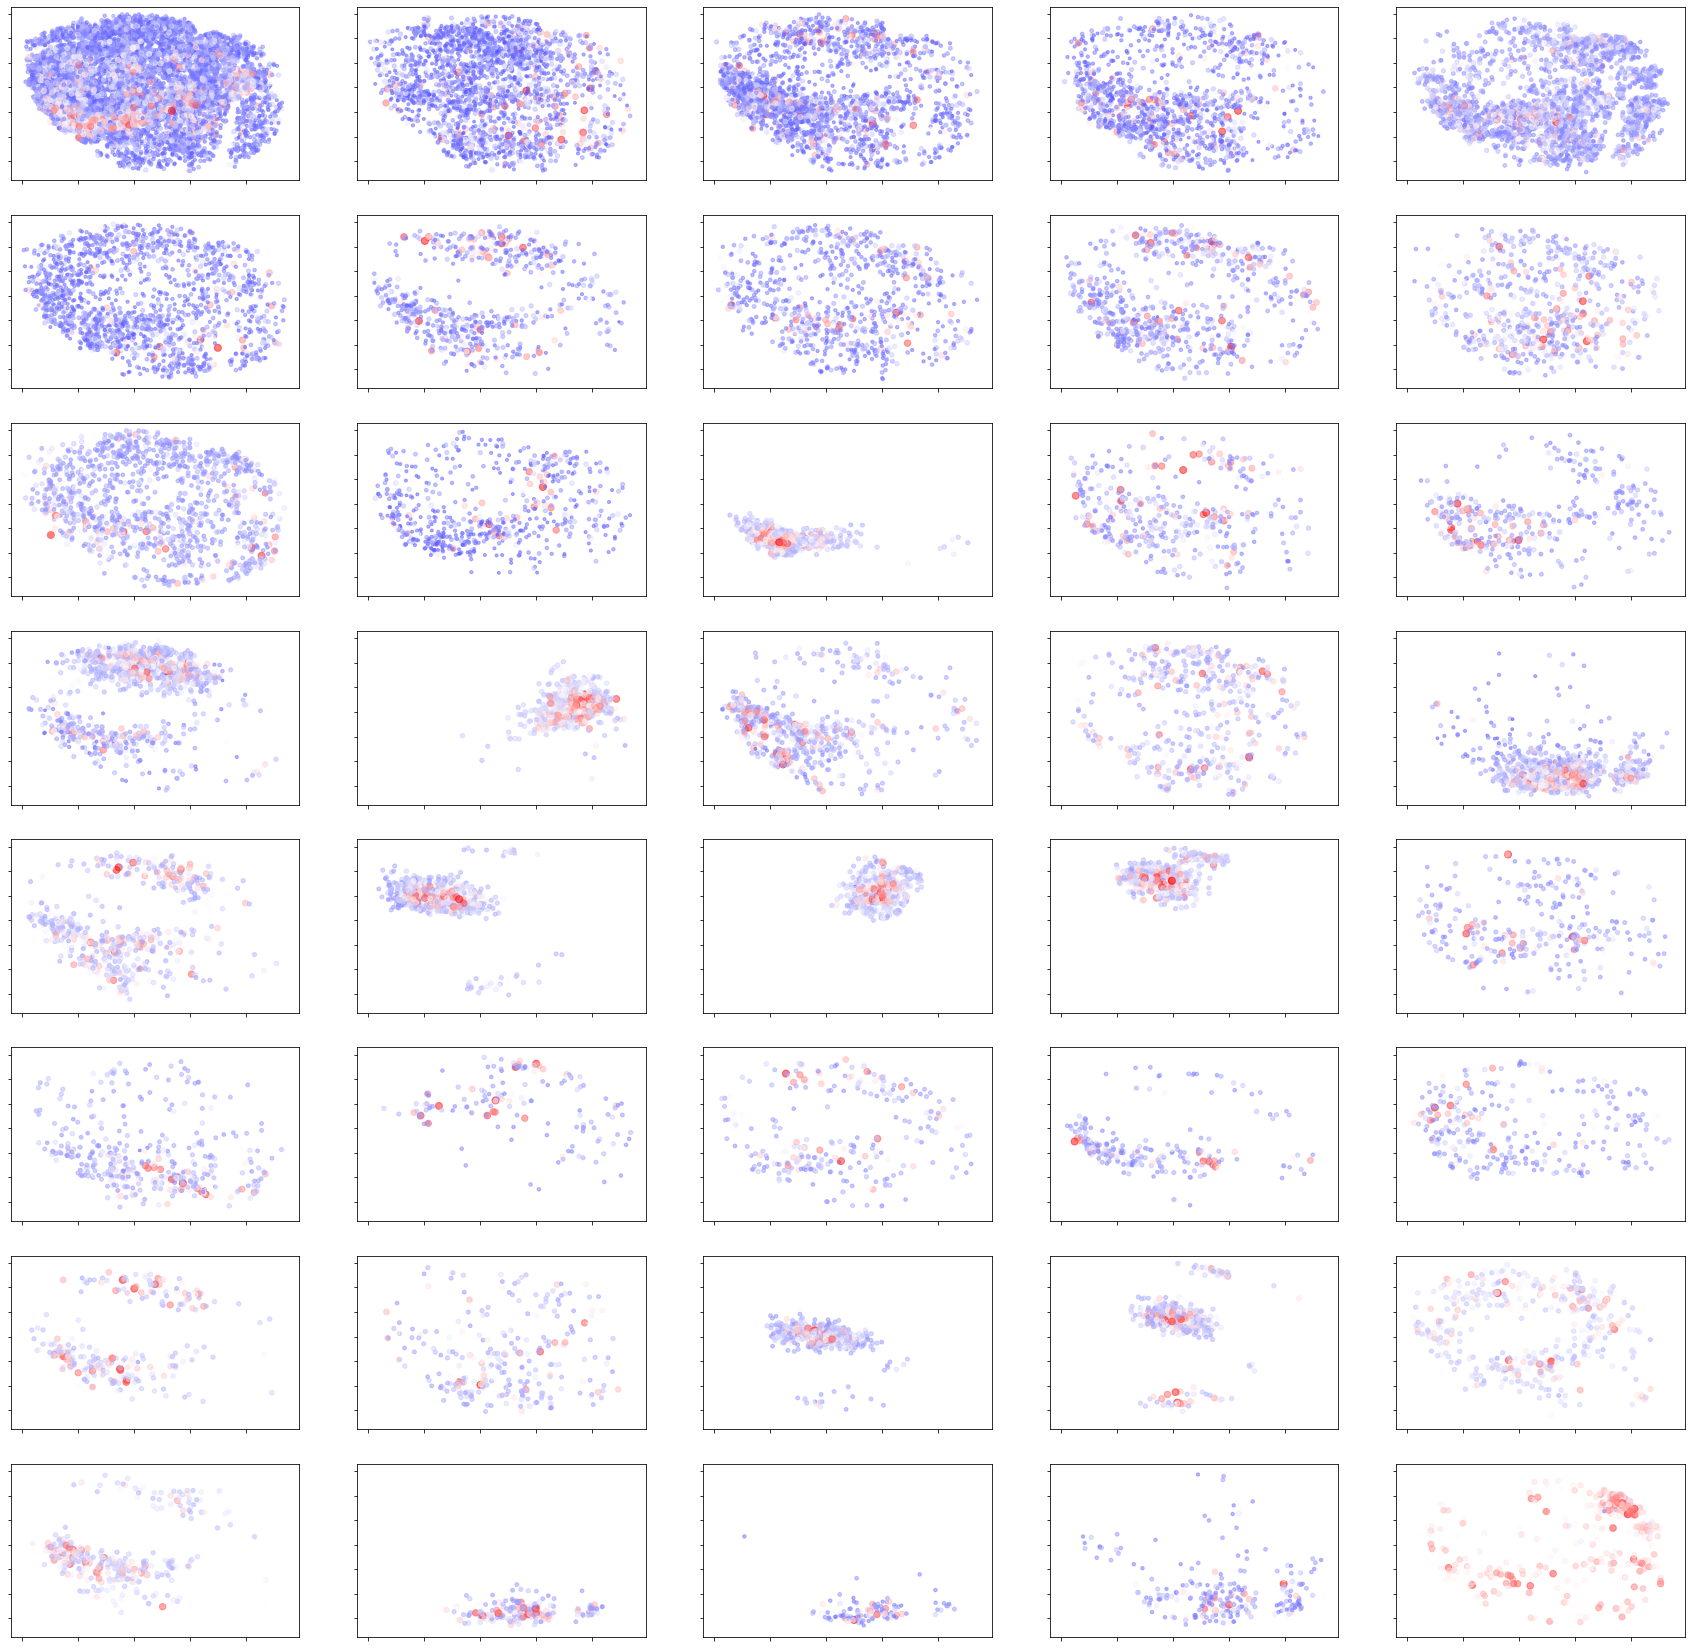

In [9]:
plt.figure(figsize=(30,30))
for j in range(40):
    comp= U[:,j]
    comp= comp/np.max(np.abs(comp))
    lam = np.abs(comp)    
    ax=plt.subplot(8,5,1+j)
    plt.scatter(xpos, -ypos, s = 50 * lam, c = comp, cmap='bwr', alpha = .5)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    #plt.colorbar()